In [1]:
import numpy as np 
import torch
import cv2

def iou_score(output, target):
    smooth = 1e-5

    output_ = output > 0.5
    target_ = target > 0.5
    intersection = (output_ & target_).sum()
    union = (output_ | target_).sum()

    return (intersection + smooth) / (union + smooth)


def dice_coef(output, target):
    smooth = 1e-5

    intersection = (output * target).sum()

    return (2. * intersection + smooth) / \
        (output.sum() + target.sum() + smooth)

100%|█████████████████████████████████████████| 648/648 [00:15<00:00, 42.89it/s]


647
['malignant (210).png', 'benign (214).png', 'benign (370).png', 'malignant (98).png', 'malignant (71).png', 'benign (399).png', 'malignant (155).png', 'malignant (40).png', 'benign (287).png', 'benign (75).png', 'benign (341).png', 'benign (225).png', 'malignant (106).png', 'benign (102).png', 'malignant (69).png', 'malignant (22).png', 'benign (381).png', 'benign (149).png', 'malignant (80).png', 'malignant (208).png', 'benign (276).png', 'benign (312).png', 'benign (84).png', 'malignant (195).png', 'benign (26).png', 'benign (178).png', 'malignant (13).png', 'malignant (58).png', 'malignant (44).png', 'benign (164).png', 'malignant (160).png', 'benign (98).png', 'benign (210).png', 'benign (155).png', 'malignant (75).png', 'malignant (151).png', 'benign (409).png', 'benign (195).png', 'benign (272).png', 'benign (316).png', 'malignant (191).png', 'benign (80).png', 'benign (22).png', 'malignant (133).png', 'benign (420).png', 'malignant (178).png', 'malignant (17).png', 'benign (

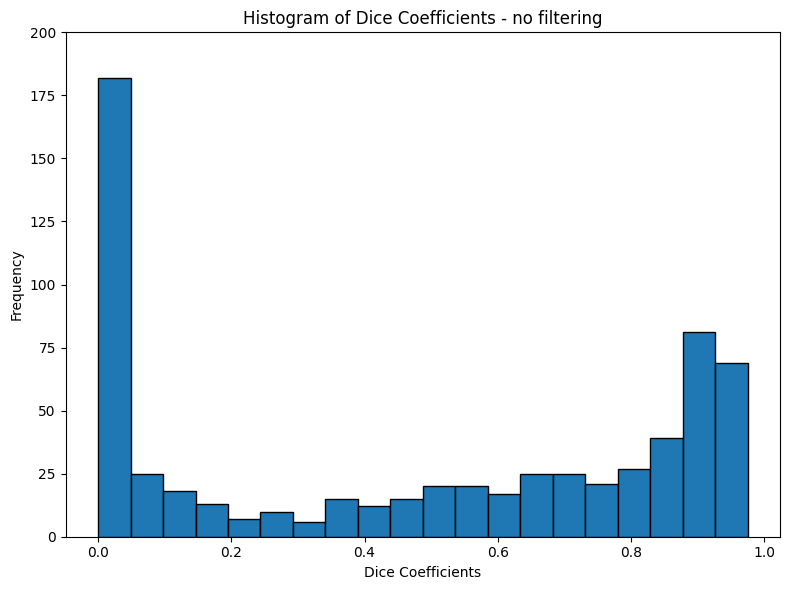

0.3955812734945767
0.4735222185768567


In [2]:
import os
total = 0
iou = 0
dice = 0
from tqdm import tqdm
output_path = "outputs/few_shot_centroid_neg/" 
label_path = "../pytorch-nested-unet/inputs/breast-cancer/masks/0/"
tp = []
dice_list = []
for filename in tqdm(os.listdir(output_path)):
    if os.path.isfile(os.path.join(output_path, filename)) and (filename.startswith("benign") or filename.startswith("malignant")):
        output = cv2.imread(os.path.join(output_path, filename), cv2.IMREAD_GRAYSCALE) / 255
        target = cv2.imread(os.path.join(label_path, filename[:-4]+"_mask.png"), cv2.IMREAD_GRAYSCALE) / 255
        true_percent = target.sum() / target.size
        if (true_percent < 0.4 and true_percent > 0.03):
            tp.append(filename)
        if (True):
            total += 1
            iou += iou_score(output, target)
            dice += dice_coef(output, target)
            dice_list.append(dice_coef(output, target))

 
print(total)

print (tp)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(dice_list, bins=20, edgecolor='black')
plt.xlabel("Dice Coefficients")
plt.ylabel("Frequency")
plt.title("Histogram of Dice Coefficients - no filtering")
plt.ylim(0, 200)

# Show the plot
plt.tight_layout()
plt.show()

print (iou / total)
print (dice / total)

In [4]:
filename = "benign (105)_mask.png"
print(iou_score(output, target))

0.848826815698761
